# Análisis Probabilístico y Modelado

Este notebook contiene un análisis probabilístico y modelado basado en las respuestas obtenidas del formulario.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('viridis')

# Cargar los datos
file_path = 'Respuestas.xlsx'
sheet_name = 'Respuestas de formulario 1'
df = pd.read_excel(file_path, sheet_name=sheet_name)


## Sección 5
### Problema 1: Probabilidad conjunta de nivel intermedio en Blockchain y considerar esta tecnología útil

In [23]:

# Filtrar los datos para calcular la probabilidad conjunta
  
nivel_intermedio = df['¿Cuál es tu nivel de conocimiento sobre Blockchain? '] == 'Intermedio'
considera_util = df['¿Consideras que el Blockchain es una tecnología útil para la ciberseguridad? '] == 'Sí'

prob_conjunta = (nivel_intermedio & considera_util).mean()

# Mostrar resultado
print(f"Probabilidad conjunta: {prob_conjunta:.4f}")


Probabilidad conjunta: 0.0667


### Problema 2: Probabilidad de estar actualizado y pertenecer a una carrera específica (Bayes)

In [24]:
# Filtrar datos necesarios
actualizados_bastante = df[df['¿Qué tan actualizado(a) te consideras en las nuevas tecnologías de sistemas computacionales? '] == 'Bastante']
gestion_software = df[df['Carrera'] == 'Licenciatura en Desarrollo y Gestión del Software']

# Calcular P(A): Proporción de estudiantes en "Desarrollo y Gestión de Software"
p_a = len(gestion_software) / len(df)

# Calcular P(B): Proporción de estudiantes bastante actualizados
p_b = len(actualizados_bastante) / len(df)

# Calcular P(B|A): Proporción de estudiantes bastante actualizados en "Desarrollo y Gestión de Software"
p_b_given_a = len(actualizados_bastante[actualizados_bastante['Carrera'] == 'Licenciatura en Desarrollo y Gestión del Software']) / len(gestion_software)

# Aplicar Teorema de Bayes
p_a_given_b = (p_b_given_a * p_a) / p_b

# Mostrar resultado
print(f"La probabilidad de que un estudiante bastante actualizado pertenezca a 'Desarrollo y Gestión de Software' es: {p_a_given_b:.2%}")


La probabilidad de que un estudiante bastante actualizado pertenezca a 'Desarrollo y Gestión de Software' es: 25.00%


## Sección 6
### Problema 1: Modelar respuestas de actualización como distribución binomial

n: 30
p: 0.26666666666666666
x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
binomial_pmf: [9.10002914e-05 9.92730452e-04 5.23439693e-03 1.77652259e-02
 4.36055546e-02 8.24541396e-02 1.24930514e-01 1.55757525e-01
 1.62837412e-01 1.44744366e-01 1.10532061e-01 7.30790489e-02
 4.20758160e-02 2.11850263e-02 9.35442718e-03 3.62838388e-03
 1.23694905e-03 3.70423244e-04 9.72828723e-05 2.23424778e-05
 4.46849557e-06 7.73765467e-07 1.15105607e-07 1.45588119e-08
 1.54411641e-09 1.34759251e-10 9.42372382e-12 5.07675357e-13
 1.97795594e-14 4.96039107e-16 6.01259523e-18]


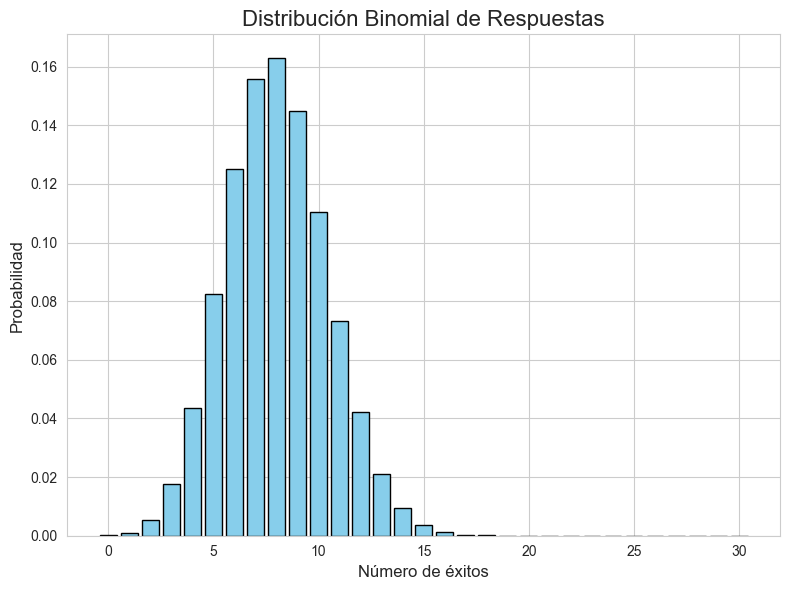

In [25]:
from scipy.stats import binom

# Parámetros para la distribución binomial
n = len(df)
p = df['¿Qué tan actualizado(a) te consideras en las nuevas tecnologías de sistemas computacionales? '].value_counts(normalize=True)['Bastante']

# Generar distribución binomial
x = np.arange(0, n + 1)
binomial_pmf = binom.pmf(x, n, p)

# Imprimir resultados de las variables
print(f"n: {n}")
print(f"p: {p}")
print(f"x: {x}")
print(f"binomial_pmf: {binomial_pmf}")

# Gráfica de la distribución
plt.figure(figsize=(8, 6))
plt.bar(x, binomial_pmf, color='skyblue', edgecolor='black')
plt.title("Distribución Binomial de Respuestas", fontsize=16)
plt.xlabel("Número de éxitos", fontsize=12)
plt.ylabel("Probabilidad", fontsize=12)
plt.tight_layout()
plt.show()


### Problema 2: Probabilidad de que exactamente 3 estudiantes tengan nivel avanzado en IA

In [26]:

# Parámetros para la distribución de Poisson
from scipy.stats import poisson

lambda_param = 2  # Promedio de 2 estudiantes por carrera
k = 3  # Exactamente 3 estudiantes

# Calcular probabilidad
probabilidad_poisson = poisson.pmf(k, lambda_param)

# Mostrar resultado
print(f"Probabilidad de exactamente 3 estudiantes con nivel avanzado en IA: {probabilidad_poisson:.4f}")


Probabilidad de exactamente 3 estudiantes con nivel avanzado en IA: 0.1804


## Sección 7
### Problema 1: Probabilidad de tener más de 30 años (Distribución normal ajustada)

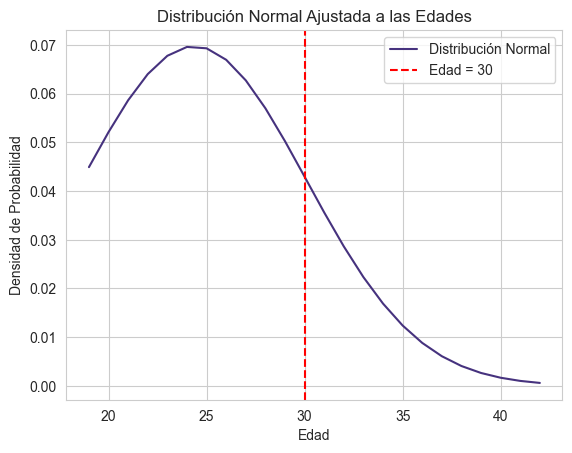

Probabilidad de tener más de 30 años: 0.1624


In [27]:

from scipy.stats import norm

# Parámetros para la distribución normal
mu = df['Edad'].mean()
sigma = df['Edad'].std()

# Calcular probabilidad de más de 30 años
prob_mas_30 = 1 - norm.cdf(30, loc=mu, scale=sigma)

# Crear gráfico
x = range(int(df['Edad'].min()), int(df['Edad'].max()) + 1)
pdf = norm.pdf(x, loc=mu, scale=sigma)

plt.plot(x, pdf, label='Distribución Normal')
plt.axvline(30, color='red', linestyle='dashed', label='Edad = 30')
plt.title("Distribución Normal Ajustada a las Edades")
plt.xlabel("Edad")
plt.ylabel("Densidad de Probabilidad")
plt.legend()
plt.show()

# Mostrar resultado
print(f"Probabilidad de tener más de 30 años: {prob_mas_30:.4f}")


### Problema 2: Problema con la distribucion normal

### Descripción:
Este problema utiliza la distribución normal para modelar las edades de los estudiantes en la encuesta, con una media (
𝜇
μ) de 25 años y una desviación estándar (
𝜎
σ) de 5 años.

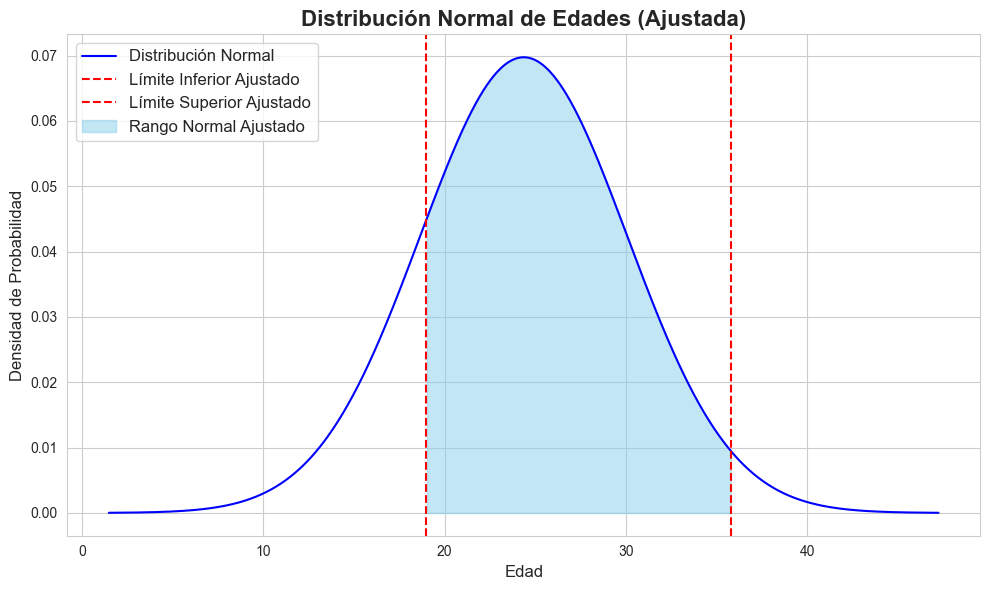

Probabilidad dentro del rango normal ajustado: 80.32%
Probabilidad de ser extremo ajustado: 19.68%


In [29]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Obtener la columna de edades del DataFrame
edades = df['Edad']

# Parámetros de la distribución normal basados en los datos reales
mu = edades.mean()  # Media
sigma = edades.std()  # Desviación estándar

# Límites ajustados al rango real
min_real = edades.min()
max_real = edades.max()

# Calcular límites dentro de ±2 desviaciones estándar
z_min = max(min_real, mu - 2 * sigma)  # Máximo entre el límite calculado y el mínimo real
z_max = min(max_real, mu + 2 * sigma)  # Mínimo entre el límite calculado y el máximo real

# Objetivo 1: Probabilidad dentro del rango "normal" ajustado
probabilidad_normal_ajustada = norm.cdf(z_max, mu, sigma) - norm.cdf(z_min, mu, sigma)

# Objetivo 2: Probabilidad de ser extremo ajustado
probabilidad_extremo_ajustada = 1 - probabilidad_normal_ajustada

# Crear un rango de valores para la gráfica
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)
pdf = norm.pdf(x, mu, sigma)

# Graficar la distribución normal ajustada
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, color='blue', label="Distribución Normal")
plt.axvline(z_min, color='red', linestyle='--', label="Límite Inferior Ajustado")
plt.axvline(z_max, color='red', linestyle='--', label="Límite Superior Ajustado")
plt.fill_between(x, pdf, where=(x >= z_min) & (x <= z_max), color='skyblue', alpha=0.5, label="Rango Normal Ajustado")
plt.title("Distribución Normal de Edades (Ajustada)", fontsize=16, weight='bold')
plt.xlabel("Edad", fontsize=12)
plt.ylabel("Densidad de Probabilidad", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar resultados ajustados
print(f"Probabilidad dentro del rango normal ajustado: {probabilidad_normal_ajustada:.2%}")
print(f"Probabilidad de ser extremo ajustado: {probabilidad_extremo_ajustada:.2%}")
